In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats 
import csv
import hvplot.pandas
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [102]:
# Create a file path
file_path = "https://raw.githubusercontent.com/elisabethjansen/project1/main/Resources/census_housing_data_2019_2023.csv"
data = pd.read_csv(file_path)

In [103]:
# Set the display options to show all rows and columns
census_data.drop(census_data.loc[census_data['Median_Gross_Rent']<=0].index,inplace=True)
census_data.drop(census_data.loc[census_data['Median_Monthly_Owner_Costs']<=0].index,inplace = True)
census_data.head()

,Owner_Occupied_Units,Total_Occupied_Units,Median_Gross_Rent,Total_Housing_Units,Median_Household_Income,Median_Monthly_Owner_Costs,Total_Population,Householder_Under_25,Householder_25_34,Householder_35_44,...,Householder_Asian,Householder_NativeHawaiian_PacificIslander,Householder_OtherRace,Householder_TwoOrMoreRaces,Below_Poverty_Level,Zip_Code,Year,Homeownership_Rate,Rent_Income_Ratio,Owner_Cost_Income_Ratio
0,3283.0,5509.0,59.593393,7250.0,14361.0,771.0,17113.0,3283.0,6.0,82.0,...,0.0,0.0,1233.0,63.0,10552.0,601,2019,59.593393,0.414967,64.424483
1,9528.0,12740.0,74.788069,17538.0,16807.0,877.0,37751.0,9528.0,18.0,354.0,...,0.0,0.0,375.0,1124.0,18653.0,602,2019,74.788069,0.444982,62.616767
2,11118.0,19228.0,57.821926,24322.0,16049.0,832.0,47081.0,11118.0,50.0,457.0,...,47.0,0.0,2710.0,232.0,23691.0,603,2019,57.821926,0.360284,62.209483
3,1470.0,1946.0,75.539568,2783.0,12119.0,526.0,6392.0,1470.0,0.0,20.0,...,0.0,0.0,963.0,29.0,4185.0,606,2019,75.539568,0.623315,52.083505
4,6758.0,8795.0,76.839113,12455.0,19898.0,751.0,26686.0,6758.0,27.0,367.0,...,0.0,0.0,643.0,744.0,12204.0,610,2019,76.839113,0.386165,45.290984


In [104]:
# Ensure numeric conversion for relevant columns
census_data['Median_Gross_Rent'] = pd.to_numeric(census_data['Median_Gross_Rent'], errors='coerce')
census_data['Median_Household_Income'] = pd.to_numeric(census_data['Median_Household_Income'], errors='coerce')
census_data['Median_Monthly_Owner_Costs'] = pd.to_numeric(census_data['Median_Monthly_Owner_Costs'], errors='coerce')

# Filter data for the years 2019 to 2022
data_2019_2022 = census_data[(census_data['Year'] >= 2019) & (census_data['Year'] <= 2022)]

# Calculate rent/income ratio
data_2019_2022['Rent_Income_Ratio'] = (data_2019_2022['Median_Gross_Rent'] / data_2019_2022['Median_Household_Income']) * 100

# Calculate owner cost/income ratio (annual owner costs divided by household income)
data_2019_2022['Owner_Cost_Income_Ratio'] = (data_2019_2022['Median_Monthly_Owner_Costs'] * 12 / data_2019_2022['Median_Household_Income']) * 100

# Display the first few rows of the dataframe to verify the new columns
print(data_2019_2022[['Year', 'Median_Gross_Rent', 'Median_Household_Income', 'Rent_Income_Ratio', 'Owner_Cost_Income_Ratio']].head())


   Year  Median_Gross_Rent  Median_Household_Income  Rent_Income_Ratio  \
0  2019          59.593393                  14361.0           0.414967   
1  2019          74.788069                  16807.0           0.444982   
2  2019          57.821926                  16049.0           0.360284   
3  2019          75.539568                  12119.0           0.623315   
4  2019          76.839113                  19898.0           0.386165   

   Owner_Cost_Income_Ratio  
0                64.424483  
1                62.616767  
2                62.209483  
3                52.083505  
4                45.290984  


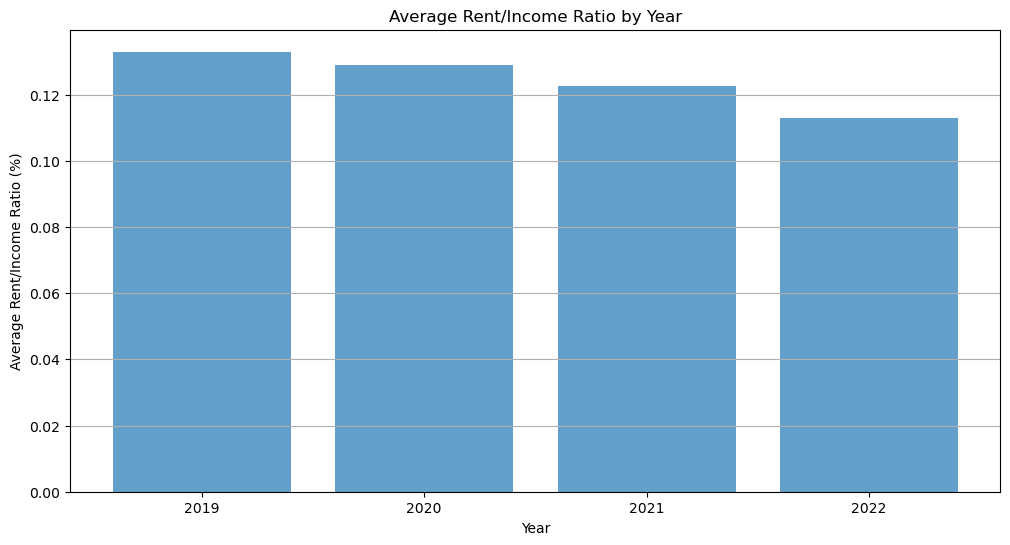

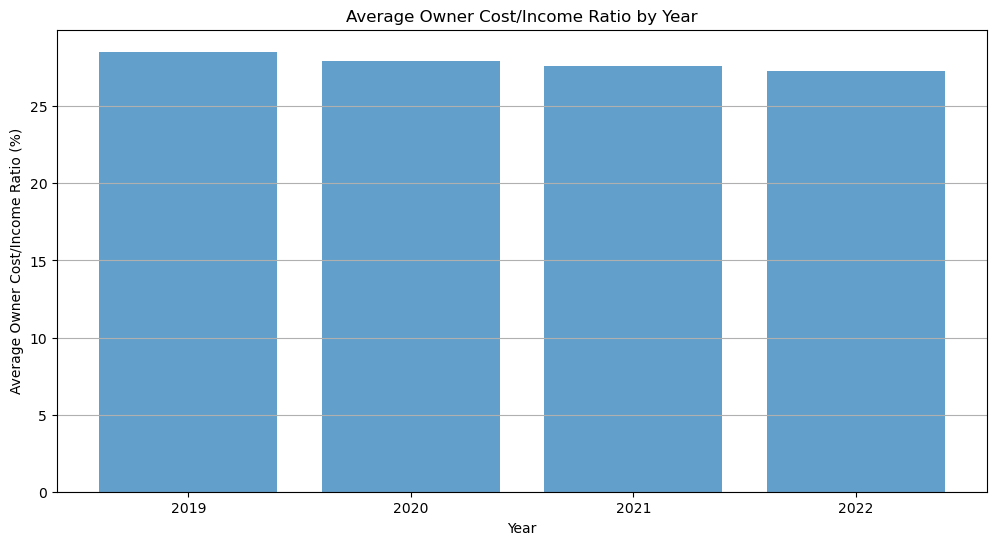

In [105]:
# List of years to plot
years = [2019, 2020, 2021, 2022]

# Create a bar chart for Rent/Income Ratio
plt.figure(figsize=(12, 6))
mean_rent_income_ratio = {}
for year in years:
    year_data = data_2019_2022[data_2019_2022['Year'] == year]
    mean_rent_income_ratio[year] = year_data['Rent_Income_Ratio'].mean()
plt.bar(mean_rent_income_ratio.keys(), mean_rent_income_ratio.values(), alpha=0.7)
plt.title('Average Rent/Income Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Rent/Income Ratio (%)')
plt.xticks(years)
plt.grid(axis='y')
plt.show()

# Create a bar chart for Owner Cost/Income Ratio
plt.figure(figsize=(12, 6))
mean_owner_cost_income_ratio = {}
for year in years:
    year_data = data_2019_2022[data_2019_2022['Year'] == year]
    mean_owner_cost_income_ratio[year] = year_data['Owner_Cost_Income_Ratio'].mean()
plt.bar(mean_owner_cost_income_ratio.keys(), mean_owner_cost_income_ratio.values(), alpha=0.7)
plt.title('Average Owner Cost/Income Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Average Owner Cost/Income Ratio (%)')
plt.xticks(years)
plt.grid(axis='y')
plt.show()

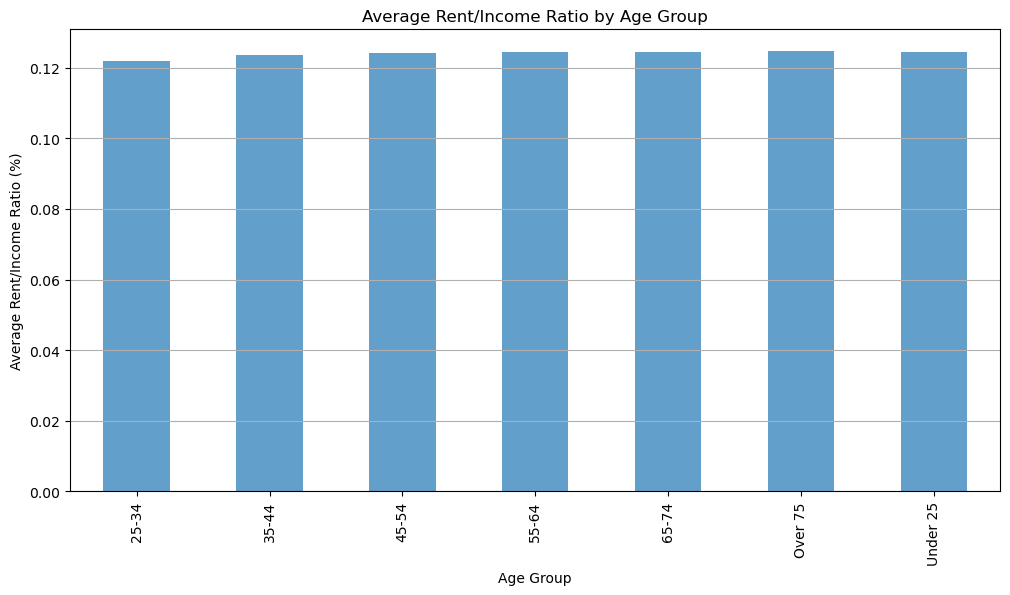

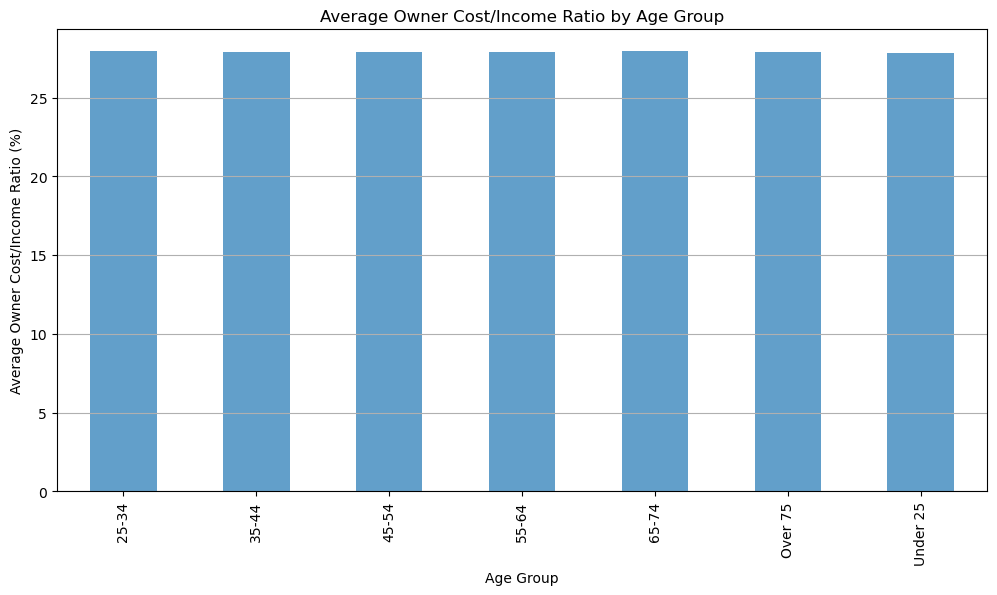

In [106]:


# Ensure numeric conversion for relevant columns
census_data['Median_Gross_Rent'] = pd.to_numeric(census_data['Median_Gross_Rent'], errors='coerce')
census_data['Median_Household_Income'] = pd.to_numeric(census_data['Median_Household_Income'], errors='coerce')
census_data['Median_Monthly_Owner_Costs'] = pd.to_numeric(census_data['Median_Monthly_Owner_Costs'], errors='coerce')

# Filter data for the years 2019 to 2022
data_2019_2022 = census_data[(census_data['Year'] >= 2019) & (census_data['Year'] <= 2022)]

# Calculate rent/income ratio
data_2019_2022['Rent_Income_Ratio'] = (data_2019_2022['Median_Gross_Rent'] / data_2019_2022['Median_Household_Income']) * 100

# Calculate owner cost/income ratio (annual owner costs divided by household income)
data_2019_2022['Owner_Cost_Income_Ratio'] = (data_2019_2022['Median_Monthly_Owner_Costs'] * 12 / data_2019_2022['Median_Household_Income']) * 100

# Define age groups based on available columns
age_groups = {
    'Householder_Under_25': 'Under 25',
    'Householder_25_34': '25-34',
    'Householder_35_44': '35-44',
    'Householder_45_54': '45-54',
    'Householder_55_64': '55-64',
    'Householder_65_74': '65-74',
    'Householder_75_Over': 'Over 75',
    
}

# Initialize dictionaries to store mean values for each age group
mean_rent_income_ratio_age = {}
mean_owner_cost_income_ratio_age = {}

# Calculate mean ratios for each age group
for column, age_group in age_groups.items():
    # Filter data for the current age group
    age_group_data = data_2019_2022[data_2019_2022[column] > 0]
    
    # Calculate mean Rent/Income Ratio and Owner Cost/Income Ratio for the current age group
    mean_rent_income_ratio_age[age_group] = age_group_data['Rent_Income_Ratio'].mean()
    mean_owner_cost_income_ratio_age[age_group] = age_group_data['Owner_Cost_Income_Ratio'].mean()

# Convert dictionaries to pandas Series for plotting
mean_rent_income_ratio_age = pd.Series(mean_rent_income_ratio_age)
mean_owner_cost_income_ratio_age = pd.Series(mean_owner_cost_income_ratio_age)

# Plotting the bar chart for Rent/Income Ratio by Age Group
plt.figure(figsize=(12, 6))
mean_rent_income_ratio_age.sort_index().plot(kind='bar', alpha=0.7)
plt.title('Average Rent/Income Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rent/Income Ratio (%)')
plt.grid(axis='y')
plt.show()

# Plotting the bar chart for Owner Cost/Income Ratio by Age Group
plt.figure(figsize=(12, 6))
mean_owner_cost_income_ratio_age.sort_index().plot(kind='bar', alpha=0.7)
plt.title('Average Owner Cost/Income Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Owner Cost/Income Ratio (%)')
plt.grid(axis='y')
plt.show()



In [107]:


# Ensure numeric conversion for relevant columns
census_data['Median_Gross_Rent'] = pd.to_numeric(census_data['Median_Gross_Rent'], errors='coerce')
census_data['Median_Household_Income'] = pd.to_numeric(census_data['Median_Household_Income'], errors='coerce')
census_data['Median_Monthly_Owner_Costs'] = pd.to_numeric(census_data['Median_Monthly_Owner_Costs'], errors='coerce')

# Filter data for the years 2019 to 2022
data_2019_2022 = data[(data['Year'] >= 2019) & (data['Year'] <= 2022)]

# Calculate rent/income ratio
data_2019_2022['Rent_Income_Ratio'] = (data_2019_2022['Median_Gross_Rent'] / data_2019_2022['Median_Household_Income']) * 100

# Calculate owner cost/income ratio (annual owner costs divided by household income)
data_2019_2022['Owner_Cost_Income_Ratio'] = (data_2019_2022['Median_Monthly_Owner_Costs'] * 12 / data_2019_2022['Median_Household_Income']) * 100

# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from relevant columns
data_2019_2022_cleaned = remove_outliers(data_2019_2022, 'Median_Gross_Rent')
data_2019_2022_cleaned = remove_outliers(data_2019_2022_cleaned, 'Median_Monthly_Owner_Costs')
data_2019_2022_cleaned = remove_outliers(data_2019_2022_cleaned, 'Rent_Income_Ratio')
data_2019_2022_cleaned = remove_outliers(data_2019_2022_cleaned, 'Owner_Cost_Income_Ratio')

# Recalculate annual trends after removing outliers
annual_trends_cleaned = data_2019_2022_cleaned.groupby('Year').agg({
    'Median_Gross_Rent': 'mean',
    'Median_Monthly_Owner_Costs': 'mean',
    'Rent_Income_Ratio': 'mean',
    'Owner_Cost_Income_Ratio': 'mean'
}).reset_index()

print("Cleaned Annual Trends:\n", annual_trends_cleaned)


Cleaned Annual Trends:
    Year  Median_Gross_Rent  Median_Monthly_Owner_Costs  Rent_Income_Ratio  \
0  2019         850.015325                 1296.687722           1.482352   
1  2020         866.847152                 1313.953040           1.467370   
2  2021         902.700089                 1361.402834           1.458991   
3  2022         957.242275                 1438.848542           1.450802   

   Owner_Cost_Income_Ratio  
0                26.965081  
1                26.524981  
2                26.259252  
3                26.030112  


In [108]:


# Ensure numeric conversion for relevant columns
census_data['Median_Gross_Rent'] = pd.to_numeric(census_data['Median_Gross_Rent'], errors='coerce')
census_data['Median_Household_Income'] = pd.to_numeric(census_data['Median_Household_Income'], errors='coerce')
census_data['Median_Monthly_Owner_Costs'] = pd.to_numeric(census_data['Median_Monthly_Owner_Costs'], errors='coerce')

# Filter data for the years 2019 to 2022
data_2019_2022 = data[(data['Year'] >= 2019) & (data['Year'] <= 2022)]

# Calculate rent/income ratio
data_2019_2022['Rent_Income_Ratio'] = (data_2019_2022['Median_Gross_Rent'] / data_2019_2022['Median_Household_Income']) * 100

# Calculate owner cost/income ratio (annual owner costs divided by household income)
data_2019_2022['Owner_Cost_Income_Ratio'] = (data_2019_2022['Median_Monthly_Owner_Costs'] * 12 / data_2019_2022['Median_Household_Income']) * 100

# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from relevant columns
columns_to_clean = ['Median_Gross_Rent', 'Median_Monthly_Owner_Costs', 'Rent_Income_Ratio', 'Owner_Cost_Income_Ratio']
for column in columns_to_clean:
    data_2019_2022 = remove_outliers(data_2019_2022, column)

# Calculate annual trends after removing outliers
annual_trends_cleaned = data_2019_2022.groupby('Year').agg({
    'Median_Gross_Rent': 'mean',
    'Median_Monthly_Owner_Costs': 'mean',
    'Rent_Income_Ratio': 'mean',
    'Owner_Cost_Income_Ratio': 'mean'
}).reset_index()

print("Cleaned Annual Trends:\n", annual_trends_cleaned)

# Define age groups based on available columns
age_groups = {
    'Householder_<25yrs': 'Under 25',
    'Householder_25-34yrs': '25-34',
    'Householder_35-44yrs': '35-44',
    
}

# Initialize dictionaries to store mean values for each age group
mean_rent_income_ratio_age = {}
mean_owner_cost_income_ratio_age = {}

# Calculate mean ratios for each age group
for column, age_group in age_groups.items():
    # Filter data for the current age group
    age_group_data = data_2019_2022[data_2019_2022[column] > 0]
    
    # Calculate mean Rent/Income Ratio and Owner Cost/Income Ratio for the current age group
    mean_rent_income_ratio_age[age_group] = age_group_data['Rent_Income_Ratio'].mean()
    mean_owner_cost_income_ratio_age[age_group] = age_group_data['Owner_Cost_Income_Ratio']


Cleaned Annual Trends:
    Year  Median_Gross_Rent  Median_Monthly_Owner_Costs  Rent_Income_Ratio  \
0  2019         850.015325                 1296.687722           1.482352   
1  2020         866.847152                 1313.953040           1.467370   
2  2021         902.700089                 1361.402834           1.458991   
3  2022         957.242275                 1438.848542           1.450802   

   Owner_Cost_Income_Ratio  
0                26.965081  
1                26.524981  
2                26.259252  
3                26.030112  


R-squared: 0.97


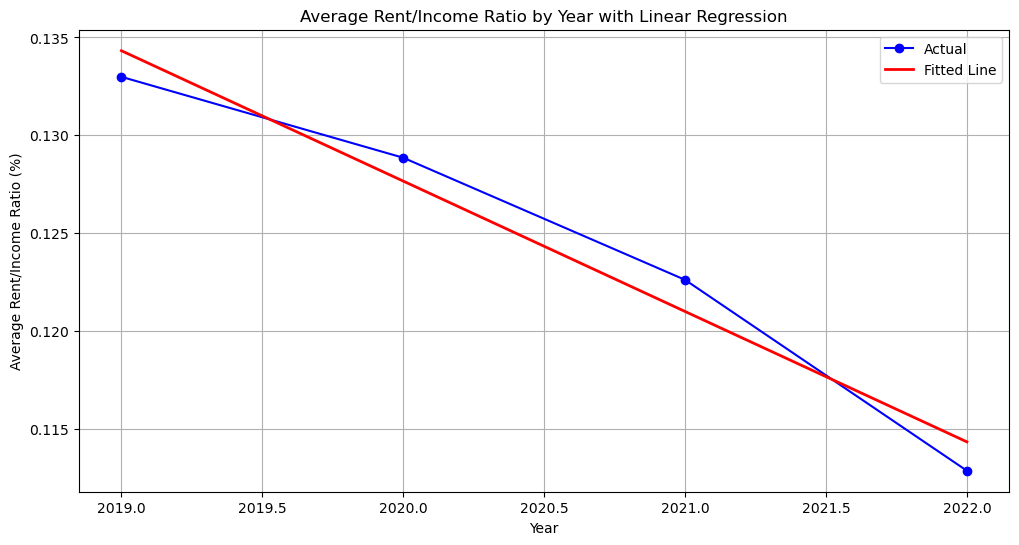

In [111]:
# Ensure relevant columns are numeric
census_data['Median_Gross_Rent'] = pd.to_numeric(census_data['Median_Gross_Rent'], errors='coerce')
census_data['Median_Household_Income'] = pd.to_numeric(census_data['Median_Household_Income'], errors='coerce')

# Filter data for the relevant years
data_filtered = census_data[(census_data['Year'] >= 2019) & (census_data['Year'] <= 2022)]

# Calculate the rent/income ratio
data_filtered['Rent_Income_Ratio'] = (data_filtered['Median_Gross_Rent'] / data_filtered['Median_Household_Income']) * 100

# Group the data by year and calculate the average rent/income ratio
average_rent_income_ratio_by_year = data_filtered.groupby('Year')['Rent_Income_Ratio'].mean().reset_index()

# Prepare data for linear regression
X = average_rent_income_ratio_by_year['Year'].values.reshape(-1, 1)
y = average_rent_income_ratio_by_year['Rent_Income_Ratio'].values

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Calculate the R-squared value
r_squared = model.score(X, y)
print(f'R-squared: {r_squared:.2f}')

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.plot(average_rent_income_ratio_by_year['Year'], average_rent_income_ratio_by_year['Rent_Income_Ratio'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(average_rent_income_ratio_by_year['Year'], model.predict(X), color='red', linewidth=2, label='Fitted Line')
plt.title('Average Rent/Income Ratio by Year with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Average Rent/Income Ratio (%)')
plt.legend()
plt.grid(True)
plt.show()